In [1]:
#Importing modules
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import time

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV




In [2]:
#Retrieving the data 

#Omer running the code
train_data = pd.read_csv('/Users/omerarif/Desktop/AIML Project/SST-2/train.tsv', delimiter='\t')
test_data = pd.read_csv('/Users/omerarif/Desktop/AIML Project/SST-2/test.tsv', delimiter='\t')
dev_data = pd.read_csv('/Users/omerarif/Desktop/AIML Project/SST-2/dev.tsv', delimiter='\t')

#Mikkel running the code
#train_data = pd.read_csv('ADD PATH TO FILE', delimiter='\t')
#test_data = pd.read_csv('ADD PATH TO FILE', delimiter='\t')
#dev_data = pd.read_csv('ADD PATH TO FILE', delimiter='\t')



In [3]:
# Getting insights into the amount of data entries, data types and columns
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67349 entries, 0 to 67348
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   sentence  67349 non-null  object
 1   label     67349 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.0+ MB


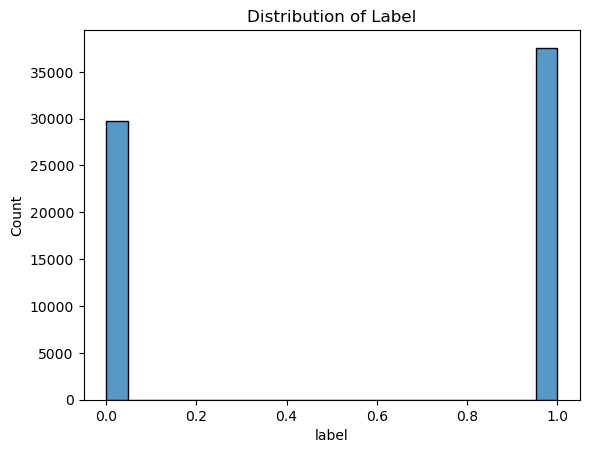

In [4]:
# Distribution of the target variable
sns.histplot(train_data['label'])
plt.title('Distribution of Label')
plt.show()

In [5]:
# Defining start time to later assess running time
start_time = time.time()

ML Modelling - Sequence of steps: Preprocessing -> Fit Model -> Predict

In [6]:
# Separating features and target variable
X = train_data["sentence"]
y = train_data["label"]

In [7]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
pipe_log = make_pipeline(TfidfVectorizer(), LogisticRegression(max_iter=2000))
pipe_rf = make_pipeline(TfidfVectorizer(), RandomForestClassifier())
pipe_mlp = make_pipeline(TfidfVectorizer(), MLPClassifier(max_iter=1000))

In [9]:
# Setting up parameter grids for different models

#Logistic Regression NOTE: FRAVALG/TILVAG AF PARAMS SKAL BEGRUNDES
param_grid_log = {
    'tfidfvectorizer__max_df': [0.9, 1.0],
    'tfidfvectorizer__ngram_range': [(1, 2), (2, 3), (3, 4), (4, 5), (5, 6), (6, 7)],
#    'tfidfvectorizer__min_df': [1, 2, 3],
#    'tfidfvectorizer__sublinear_tf': [True, False],
    'logisticregression__C': [0.1, 1, 10],
    'logisticregression__penalty': ['l2', 'l1'],
    'logisticregression__solver': ['liblinear'],
#    'logisticregression__max_iter': [100, 200, 300],
}

# Random Forest NOTE: FRAVALG/TILVAG AF PARAMS SKAL BEGRUNDES
param_grid_rf = {
    'tfidfvectorizer__max_df': [0.9],
    'tfidfvectorizer__ngram_range': [(1, 2), (2, 3)],
    'randomforestclassifier__n_estimators': [100, 150],
    'randomforestclassifier__max_depth': [None, 25],
    'randomforestclassifier__min_samples_split': [2, 5],
    'randomforestclassifier__min_samples_leaf': [2, 4]
}

#param_grid_rf = {
#    'tfidfvectorizer__max_df': [0.9, 1.0],
#    'tfidfvectorizer__ngram_range': [(1, 2), (2, 3), (3, 4), (4, 5), (5, 6), (6, 7)],
#    'randomforestclassifier__n_estimators': [100, 125, 150],  # More options for the number of trees
#    'randomforestclassifier__max_depth': [None, 25],  # Including no maximum depth
#    'randomforestclassifier__min_samples_split': [2, 5],  # Minimum number of samples required to split an internal node
#    'randomforestclassifier__min_samples_leaf': [2, 4]  # Minimum number of samples required to be at a leaf node
#}


# Multi Layered Perceptron NOTE: FRAVALG/TILVAG AF PARAMS SKAL BEGRUNDES
param_grid_mlp = {
    'tfidfvectorizer__max_df': [0.9],
    'tfidfvectorizer__ngram_range': [(1, 2), (2, 3)],
    'mlpclassifier__hidden_layer_sizes': [(10,), (50,), (100,)],
    'mlpclassifier__alpha': [0.0001, 0.001],
    'mlpclassifier__learning_rate_init': [0.001]
}

#param_grid_mlp = {
#    'tfidfvectorizer__max_df': [0.9, 1.0],
#    'tfidfvectorizer__ngram_range': [(1, 2), (2, 3), (3, 4), (4, 5), (5, 6), (6, 7)],
#    'mlpclassifier__hidden_layer_sizes': [(10, 5, 5), (50, 25, 10), (100,)],
#    'mlpclassifier__alpha': [0.0001, 0.001, 0.01],
#    'mlpclassifier__learning_rate_init': [0.001, 0.01]
#}


Logistic Regression

In [10]:
# Fitting the logistic model with GridSearch
grid_log = GridSearchCV(pipe_log, param_grid_log, cv=5, n_jobs=-1)
grid_log.fit(X_train, y_train)

/Users/omerarif/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/omerarif/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                                       ('logisticregression',
                                        LogisticRegression(max_iter=2000))]),
             n_jobs=-1,
             param_grid={'logisticregression__C': [0.1, 1, 10],
                         'logisticregression__penalty': ['l2', 'l1'],
                         'logisticregression__solver': ['liblinear'],
                         'tfidfvectorizer__max_df': [0.9, 1.0],
                         'tfidfvectorizer__ngram_range': [(1, 2), (2, 3),
                                                          (3, 4), (4, 5),
                                                          (5, 6), (6, 7)]})

In [11]:
print("Best cross-validation accuracy: {:.2f}".format(grid_log.best_score_))
print("Test set score: {:.2f}".format(grid_log.score(X_test, y_test)))
print("Best parameters: {}".format(grid_log.best_params_))

Best cross-validation accuracy: 0.92
Test set score: 0.92
Best parameters: {'logisticregression__C': 10, 'logisticregression__penalty': 'l2', 'logisticregression__solver': 'liblinear', 'tfidfvectorizer__max_df': 0.9, 'tfidfvectorizer__ngram_range': (1, 2)}


Random Forest

In [12]:
# Fitting the random forest model with GridSearch
grid_rf = GridSearchCV(pipe_rf, param_grid_rf, cv=5, n_jobs=-1)
grid_rf.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                                       ('randomforestclassifier',
                                        RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'randomforestclassifier__max_depth': [None, 25],
                         'randomforestclassifier__min_samples_leaf': [2, 4],
                         'randomforestclassifier__min_samples_split': [2, 5],
                         'randomforestclassifier__n_estimators': [100, 150],
                         'tfidfvectorizer__max_df': [0.9],
                         'tfidfvectorizer__ngram_range': [(1, 2), (2, 3)]})

In [13]:
print("Best cross-validation accuracy: {:.2f}".format(grid_rf.best_score_))
print("Test set score: {:.2f}".format(grid_rf.score(X_test, y_test)))
print("Best parameters: {}".format(grid_rf.best_params_))

Best cross-validation accuracy: 0.85
Test set score: 0.86
Best parameters: {'randomforestclassifier__max_depth': None, 'randomforestclassifier__min_samples_leaf': 2, 'randomforestclassifier__min_samples_split': 2, 'randomforestclassifier__n_estimators': 150, 'tfidfvectorizer__max_df': 0.9, 'tfidfvectorizer__ngram_range': (1, 2)}


Multi Layered Perception 

In [14]:
# Fitting the multi layered perceptron model with GridSearch
grid_mlp = GridSearchCV(pipe_mlp, param_grid_mlp, cv=5, n_jobs=-1)
grid_mlp.fit(X_train, y_train)

/Users/omerarif/anaconda3/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                                       ('mlpclassifier',
                                        MLPClassifier(max_iter=1000))]),
             n_jobs=-1,
             param_grid={'mlpclassifier__alpha': [0.0001, 0.001],
                         'mlpclassifier__hidden_layer_sizes': [(10,), (50,),
                                                               (100,)],
                         'mlpclassifier__learning_rate_init': [0.001],
                         'tfidfvectorizer__max_df': [0.9],
                         'tfidfvectorizer__ngram_range': [(1, 2), (2, 3)]})

In [15]:
print("Best cross-validation accuracy: {:.2f}".format(grid_mlp.best_score_))
print("Test set score: {:.2f}".format(grid_mlp.score(X_test, y_test)))
print("Best parameters: {}".format(grid_mlp.best_params_))

Best cross-validation accuracy: 0.92
Test set score: 0.92
Best parameters: {'mlpclassifier__alpha': 0.0001, 'mlpclassifier__hidden_layer_sizes': (10,), 'mlpclassifier__learning_rate_init': 0.001, 'tfidfvectorizer__max_df': 0.9, 'tfidfvectorizer__ngram_range': (1, 2)}
